In [2]:
try:
    # import gekko se instalado
    from gekko import GEKKO
except:
    # instale gekko senão
    !pip install gekko
    from gekko import GEKKO

In [3]:
# Projeto Cerberus
# Eng de Aplicação Arthur Moreno
# Data de criação: 13/01/2020

# Problema de Otimização Dinâmica para o Controle de Trajetória de um Foguete
# Controle Ótimo de trajetória de foguete de menor tempo

import numpy as np
import matplotlib.pyplot as plt
#from gekko import GEKKO

# Criação de um modelo do tipo GEKKO
m = GEKKO()

# Vetor de tempo
m.time = np.linspace(0,1,101)

# Opções do solver do Suíte do GEKKO
m.options.NODES = 6
m.options.SOLVER = 3
m.options.IMODE = 6
m.options.MAX_ITER = 500
m.options.MV_TYPE = 0
m.options.DIAGLEVEL = 0

# Tempo Final - variável a ser minimizada (Função Objetivo)
tf = m.FV(value=1.0,lb=0.1,ub=100)
tf.STATUS = 1

# Empuxo - variável manipulada
u = m.MV(value=0,lb=-1.1,ub=1.1)
u.STATUS = 1
u.DCOST = 1e-5

# Descrições das variáveis de estado
s = m.Var(value=0)
v = m.Var(value=0,lb=0,ub=1.7)
mass = m.Var(value=1,lb=0.2)


**As equações constitutivas são:**

ṡ(t) = v(t) \\
v̇(t) =  (u(t) - 0.2v(t)²)/m(t) \\
ṁ(t) = -0.01 u(t)²

Sujeito as restrições iniciais e finais abaixo
X0 = (0,0,1) e Xf = (10,0,*) \\

0<v(t)<1.7 \\
-1.1<u(t)<1.1

In [4]:
# Equações do Movimento escalonadas por tf
m.Equation(s.dt()==tf*v)
m.Equation(mass*v.dt()==tf*(u-0.2*v**2))
m.Equation(mass.dt()==tf*(-0.01*u**2))

# Restrições - Condições finais
m.fix(s, pos=len(m.time)-1,val=10.0)
m.fix(v, pos=len(m.time)-1,val=0.0)

# Função Objetivo
m.Obj(tf)

# Solver
m.solve()

print('Solução Ótima (tempo final): ' + str(tf.value[0]))

# Vetor de tempo
ts = m.time * tf.value[0]


apm 177.37.170.176_gk_model0 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.3
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            0
   Constants    :            0
   Variables    :            5
   Intermediates:            0
   Connections  :            4
   Equations    :            4
   Residuals    :            4
 
 Number of state variables:           3897
 Number of total equations: -         3800
 Number of slack variables: -            0
 ---------------------------------------
 Degrees of freedom       :             97
 
 **********************************************
 Dynamic Control with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program contains Ipo

**Resultados**

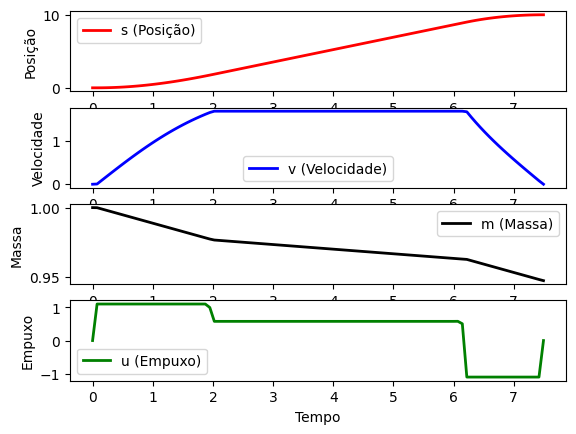

In [5]:
# Resultados
plt.figure(1)
plt.subplot(4,1,1)
plt.plot(ts,s.value,'r-',linewidth=2)
plt.ylabel('Posição')
plt.legend(['s (Posição)'])

plt.subplot(4,1,2)
plt.plot(ts,v.value,'b-',linewidth=2)
plt.ylabel('Velocidade')
plt.legend(['v (Velocidade)'])

plt.subplot(4,1,3)
plt.plot(ts,mass.value,'k-',linewidth=2)
plt.ylabel('Massa')
plt.legend(['m (Massa)'])

plt.subplot(4,1,4)
plt.plot(ts,u.value,'g-',linewidth=2)
plt.ylabel('Empuxo')
plt.legend(['u (Empuxo)'])

plt.xlabel('Tempo')
plt.show()